In [21]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

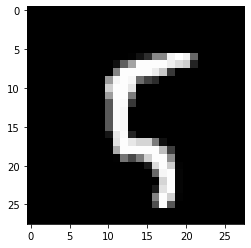

Label = 5


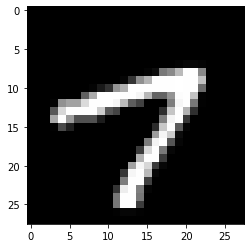

Label = 7


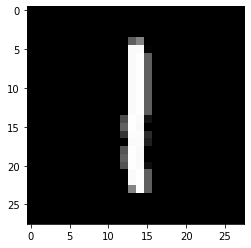

Label = 1


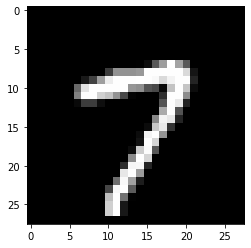

Label = 7


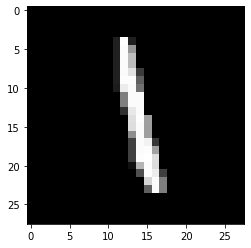

Label = 1


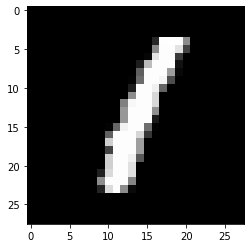

Label = 1


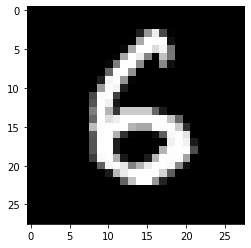

Label = 6


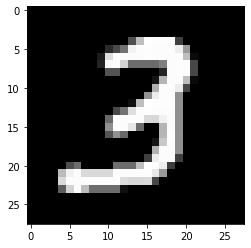

Label = 3


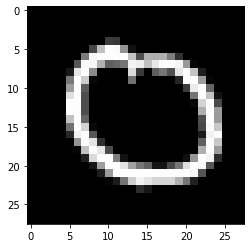

Label = 0


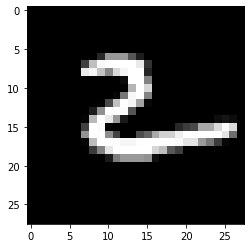

Label = 2


In [22]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

for i in range(10):
    plt.imshow(x_train[100 + i], cmap='gray')
    plt.show()
    print("Label = {}".format(y_train[100 + i]))

In [23]:
x_train, x_test = x_train.astype('float32'), x_test.astype('float32')
# y_train, y_test = y_train.astype('float32'), y_test.astype('float32')

In [24]:
num_classes = 10
num_features = x_train.shape[1] * x_train.shape[2]
x_train, x_test = tf.reshape(x_train, [-1, num_features]), tf.reshape(x_test, [-1, num_features])

In [25]:
W = tf.Variable(tf.random_normal_initializer(stddev=1)([num_features, num_classes]))
b = tf.Variable(tf.random_normal_initializer(stddev=1)([num_classes]))


def softmax_transformation(x):
    return tf.nn.softmax(tf.matmul(x, W) + b)


def cross_entropy(y_pred, y_true):
    y_true = tf.one_hot(y_true, depth=num_classes)
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred), axis=1))


def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, axis=1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [26]:
batch_size = 200
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))

In [27]:
train_data = train_data.shuffle(60000).batch(batch_size).prefetch(1)

In [28]:
lr = 0.01
optimizer = tf.optimizers.SGD(lr)


def run_optimization(x, y):
    with tf.GradientTape() as g:
        pred = softmax_transformation(x)
        loss = cross_entropy(pred, y)
    gradients = g.gradient(loss, [W, b])
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [32]:
num_epoch = 4
display_step = 100

for epoch in range(num_epoch):
    for step, (batch_x, batch_y) in enumerate(train_data, 1):
        run_optimization(batch_x, batch_y)
        if step % display_step == 0:
            pred = softmax_transformation(batch_x)
            loss = cross_entropy(pred, batch_y)
            acc = accuracy(pred, batch_y)
            print(f'epoch : {epoch}, step : {step}, loss : {loss.numpy()}, acc : {acc.numpy()}')

epoch : 0, step : 100, loss : 12.4339599609375, acc : 0.4000000059604645
epoch : 0, step : 200, loss : 12.952040672302246, acc : 0.375
epoch : 0, step : 300, loss : 11.70864486694336, acc : 0.4350000023841858
epoch : 1, step : 100, loss : 12.641192436218262, acc : 0.38999998569488525
epoch : 1, step : 200, loss : 11.086947441101074, acc : 0.4650000035762787
epoch : 1, step : 300, loss : 10.983331680297852, acc : 0.4699999988079071
epoch : 2, step : 100, loss : 10.879714012145996, acc : 0.4749999940395355
epoch : 2, step : 200, loss : 11.190564155578613, acc : 0.46000000834465027
epoch : 2, step : 300, loss : 12.330344200134277, acc : 0.4050000011920929
epoch : 3, step : 100, loss : 12.537575721740723, acc : 0.39500001072883606
epoch : 3, step : 200, loss : 11.70864486694336, acc : 0.4350000023841858
epoch : 3, step : 300, loss : 14.609902381896973, acc : 0.29499998688697815
